In [21]:
import dill
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.transforms as transforms
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

from scipy.stats import linregress

import trompy as tp

%matplotlib inline

In [22]:
datafolder = "C:\\Github\\Distraction-Paper\\data\\"
figfolder = "C:\\Github\\Distraction-Paper\\figs\\"
outputfolder = "C:\\Github\\Distraction-Paper\\output\\"

try:
    pickle_in = open(datafolder + "distraction_data_only_snips.pickle", 'rb')
except FileNotFoundError:
        print('Cannot access pickled file')

[modDict, disDict, habDict] = dill.load(pickle_in)

In [56]:
rat = 'thph1.1'
d = disDict[rat]
d.keys()

dict_keys(['rat', 'fs', 'tick', 'filt_sd', 'licks', 'licks_off', 'distractors', 'distracted', 'notdistracted', 'd_bool_array', 'pdp', 'pre_dp', 'lickdata', 'snips_distractors', 'snips_distracted', 'snips_not-distracted'])

In [30]:
epoch = [50, 80]
pdp_threshold = 1

PDPs = []
AUCs = []

rats = disDict.keys()
for rat in rats:
    d = disDict[rat]
    snips = d["snips_distractors"]["filt_z"]
    
    PDPs.append([pdp for pdp in d["pdp"] if pdp > pdp_threshold])
    AUCs.append([np.sum(snip[epoch[0]:epoch[1]]) for snip, pdp in zip(snips, d["pdp"]) if pdp > pdp_threshold])
    
PDPs = tp.flatten_list(PDPs)
AUCs = tp.flatten_list(AUCs)

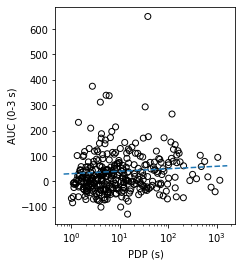

In [62]:

f, ax = plt.subplots(figsize=(5,4))
f.subplots_adjust(left=0.4)

ax.scatter(PDPs, AUCs, marker="o", color="none", edgecolor="k")

ax.set_ylabel("AUC (0-3 s)")
ax.set_xlabel("Post-distraction pause (s)")

# ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
# ax.set_xticklabels(["0", "1", "10", "100,", "1000"])
ax.set_xscale("log")

slope, intercept, r, p, _ = linregress(PDPs, AUCs)

x1, x2 = ax.get_xlim()
ax.plot([x1, x2], [x1*slope + intercept, x2*slope+intercept], "--")



In [60]:
correl

LinregressResult(slope=0.019734111992620314, intercept=28.850291652364568, rvalue=0.03110232362339699, pvalue=0.5653578454845869, stderr=0.03429268889301729)

In [48]:
x


(-57.17452354133331, 1222.3829766613335)

In [49]:
slope*x

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

In [50]:
slope

0.019734111992620314